In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string

In [2]:
df=pd.read_csv('messages.csv')
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [3]:
df.shape

(2893, 3)

In [4]:
df.columns

Index(['subject', 'message', 'label'], dtype='object')

In [5]:
df.isnull()

,subject,message,label
0,False,False,False
1,True,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2888,False,False,False
2889,False,False,False
2890,False,False,False
2891,False,False,False


In [6]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

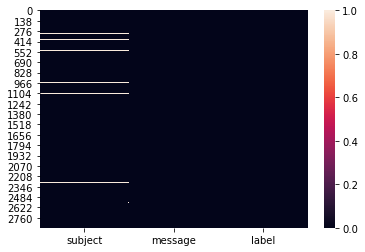

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(df.isnull())

In [8]:
to_drop = ["subject"]
df = df.drop(df[to_drop], axis=1)

In [9]:
df.columns

Index(['message', 'label'], dtype='object')

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(2859, 2)

In [12]:
df.isnull().sum()

message    0
label      0
dtype: int64

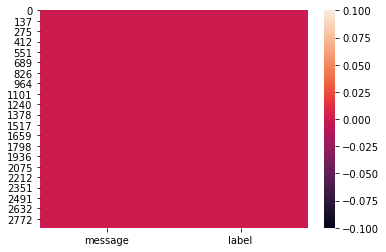

In [13]:
sns.heatmap(df.isnull())

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
def process_message(message):
    nopunc=[char for char in message if char not in string.punctuation]
    nopunc=''.join(nopunc)
    
    clean_words=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return clean_words

In [16]:
df['message'].head().apply(process_message)

0    [content, length, 3386, appleiss, research, ce...
1    [lang, classification, grimes, joseph, e, barb...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
4    [earlier, morning, phone, friend, mine, living...
Name: message, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
text_bow=CountVectorizer(analyzer=process_message).fit_transform(df['message']) 

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(text_bow,df['label'],test_size=0.20,random_state=0)

In [20]:
text_bow.shape

(2859, 64661)

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(X_train,y_train)

In [22]:
print(classifier.predict(X_train))

[0 0 0 ... 0 1 0]


In [23]:
print(y_train.values)

[0 0 0 ... 0 1 0]


In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred=classifier.predict(X_train)
print(classification_report(y_train, pred))
print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.99      0.99      0.99       366

    accuracy                           1.00      2287
   macro avg       0.99      1.00      0.99      2287
weighted avg       1.00      1.00      1.00      2287




In [25]:
print('Confusion Matrix: \n', confusion_matrix(y_train,pred))


Confusion Matrix: 
 [[1916    5]
 [   2  364]]


In [26]:
print('Accuracy: ', accuracy_score(y_train,pred))

Accuracy:  0.9969392216878006


In [27]:
print(classifier.predict(X_test))
print(y_test.values)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pred=classifier.predict(X_test)
print(classification_report(y_test, pred))
print()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       480
           1       0.91      0.98      0.94        92

    accuracy                           0.98       572
   macro avg       0.95      0.98      0.97       572
weighted avg       0.98      0.98      0.98       572




In [29]:
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print('Accuracy: ', accuracy_score(y_test,pred))

Confusion Matrix: 
 [[471   9]
 [  2  90]]
Accuracy:  0.9807692307692307


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [31]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [32]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [34]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************************************',name,'**********************************')
    print('\n')
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score =',AS)
    score.append(AS*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print('\n')

*********************************************** KNeighborsClassifier **********************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score = 0.9283216783216783


roc_auc_score= 0.7771739130434783


classification_report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       480
           1       1.00      0.55      0.71        92

    accuracy                           0.93       572
   macro avg       0.96      0.78      0.84       572
weighted avg       0.93      0.93      0.92       572





*********************************************** SVC **********************************


SVC()


Accuracy_score = 0.951048951048951


roc_auc_score= 0.8478260869565217


classification_report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       480
           1       1.00      0.70      0.82        92

    accuracy                           0.95       572
   macro avg     